# Machine Learning Application Phenotypic All Subjects

This notebook applies what was found in the machine learning for all subjects notebook.
There are two datasets used in this notebook: training and testing. 
The training dataset is the cleaned phenotypic data for all subjects. 
The testing dataset is the cleaned phenotypic data for all sites.

The features for this application is the personal characteristics for each subject as shown in the testing set.

The application will include two tests: 

1. Multi-class classification with LDA

2. Binary classification with SVM

## Imports

These are the imports that are required for this notebook to run properly

- `os` to access the file

- `pandas` to work with dataframes

- `matplotlib.pyplot` for displaying confusion matrices

- `seaborn` for formatting plots


- `SVC` for a SVM machine learning model

- `LinearDiscriminantAnalysis` for a LDA machine learning model

- `KNeighborsClassifier` for KNN machine learning model

- `accuracy_score()` and `confusion_matris()` to evaluate the accuracy of the model

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

### get_base_filepath()

Access the filepath for th ebase folder of the project. 
From here, any other asset of the project can be located.

**Input:** None

**Output:** The filepath to the root of the folder

In [2]:
def get_base_filepath():
    '''
    Access the filepath for the base folder of the project
    
    Input: None
    
    Output: The filepath to the root of the folder
    '''
    # Get current directory
    os.path.abspath(os.curdir)

    # Go up a directory level
    os.chdir('..')
    
    # Go up a directory level
    os.chdir('..')

    # Set baseline filepath to the project folder directory
    base_folder_filepath = os.path.abspath(os.curdir)
    return base_folder_filepath

### normalize()

Normalizes a Series

**Input:** A feature of type Series

**Output:** The normalized feature of type Series

**Dependencies:** Used in `normalize_features()`

In [3]:
def normalize(feature):
    '''
    This function normalizes a Series
    
    Input: A feature of type Series
    
    Output: The normalized feature of type Series
    '''
    # If the standard deviation is 0, do not divide by it
    if feature.std() == 0:
        return feature - feature.mean()
    
    # Otherwise, divide by the standard deviation
    return (feature - feature.mean())/feature.std()

### normalize_features()

Normalizes all features in a given dataframe. This will normalize ALL features, so ensure that the inputted dataframe consists only of numeric values.

**Input:** A dataframe to normalize

**Output:** A normalized dataframe

**Dependencies:** Uses `normalize()`

In [4]:
def normalize_features(df):
    '''
    This function normalizes all features in a dataframe
    
    Input: A pandas dataframe
    
    Output: The normalized dataframe
    '''
    for column in df.columns:
        df[column] = normalize(df[column])
    return df

### print_confusion_matrix()

Print a confusion matrix
    
**Input:**
- Confusion matrix to print
- A string to make a more clear title for the graph
        
**Ouput:** Display the confusion matrix

In [5]:
def print_confusion_matrix(cmf, name):
    '''
    Print a confusion matrix
    
    Input:
        - Confusion matrix to print
        - A string to make a more clear title for the graph
        
    Ouput: Display the confusion matrix
    '''
    plt.figure(figsize=(3,2))

    # Create matrix part of heatmape
    sns.heatmap(cmf,
            annot=True,
            fmt='g',
        )
    
    # Make graph labels
    plt.ylabel('Actual',fontsize=13)
    plt.xlabel('Prediction',fontsize=13)
    plt.title('Confusion Matrix for ' + name, fontsize=17)
    
    # Display graph
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## Import File

Locate the file using its filepath from the base folder and load the file as a dataframe.

In [6]:
# The folder for the project
base_folder_filepath = get_base_filepath()

# Phenotypic data site folder
filepath_train = base_folder_filepath + '\\Data\\Phenotypic\\2023.7.13-Cleaned_Phenotypic_All_Subjects.csv'
filepath_test = base_folder_filepath + '\\Data\\Phenotypic\\2023.7.11-Cleaned_Phenotypic_Training_Sites.csv'

# Dataframe from filepath
df_train = pd.read_csv(filepath_train, index_col='ScanDir ID')
df_test = pd.read_csv(filepath_test, index_col='ID')

### Condense Training Dataframe

The three unfilled IQ columns contain null values. 
Since the who dataframe will be used for training, it won't be necessary to include them. 
These features will be replaced with the filled versions of these columns and have the names changed to match the testing features.

In [7]:
df_train_condensed = df_train.copy()

df_train_condensed['Performance IQ'] = df_train_condensed['Performance IQ Filled']
df_train_condensed['Verbal IQ'] = df_train_condensed['Verbal IQ Filled']
df_train_condensed['IQ'] = df_train_condensed['IQ Filled']

df_train_condensed = df_train_condensed.drop(['Performance IQ Filled', 'Verbal IQ Filled', 'IQ Filled'], axis=1)

--------------------------------------------------------------------------------------------------------------------------------

# Multi-Class Classification

This section investigates how models perform when predicting the type of ADHD the subject has or if they are a control.

This is accomplished by using the phenotypic data for the sites. The target will be the diagnosis which includes three types with each number corresponding to a type diagnosis for ADHD.

    0 = TDC (Typically developing children)
    1 = ADHD-Combined
    2 = ADHD-Hyperactive/Impulsive
    3 = ADHD-Inattentive

### Separate data

Split the training and testing dataframes into features and targets. 
The target for the models is the diagnosis.

In [8]:
X_train = df_train_condensed.drop('DX', axis=1)
y_train = df_train_condensed['DX']

X_test = df_test.drop('DX', axis=1)
y_test = df_test['DX']

### Model

Train a LDA model on the training set and use it to make predictions. 
Display the accuracy.

In [9]:
clf_LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

preds_LDA = clf_LDA.predict(X_test)
accuracy_LDA = accuracy_score(y_test, preds_LDA)
accuracy_LDA

0.5964912280701754

### Confusion Matrix

Display the confusion matrix to understand what mistakes the model made.

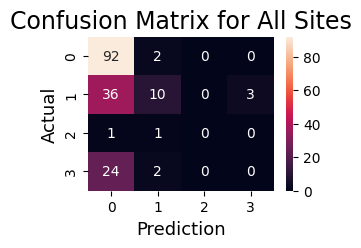

In [10]:
cfm_LDA = confusion_matrix(y_test, preds_LDA, labels=clf_LDA.classes_)

print_confusion_matrix(cfm_LDA, 'All Sites')

### Normalized Features

The second highest accuracy for multi-class classification was a normalized dataframe with a LDA model. This section investigates this method.

Make a copy of the features to normalize.

In [11]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

Normalize the features.

In [12]:
X_train_norm = normalize_features(X_train_norm)
X_test_norm = normalize_features(X_test_norm)

Create an LDA model, make predictions, and view the accuracy.

In [13]:
clf_norm_LDA = LinearDiscriminantAnalysis().fit(X_train_norm, y_train)

preds_norm_LDA = clf_norm_LDA.predict(X_test_norm)
accuracy_norm_LDA = accuracy_score(y_test, preds_norm_LDA)
accuracy_norm_LDA

0.5847953216374269

View the confusion matrix for these predictions.

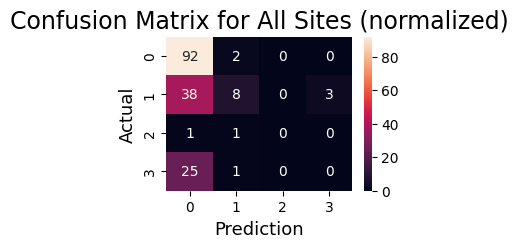

In [14]:
cfm_norm_LDA = confusion_matrix(y_test, preds_norm_LDA, labels=clf_norm_LDA.classes_)

print_confusion_matrix(cfm_norm_LDA, 'All Sites (normalized)')

The accuracies are the same, but looking at the confusion matrix reveals that the model performed worse.

The model with normalized features incorrectly diagnosed three more patients as TDC. 
This is significant since it is more important to diagnose the subject with some kind of ADHD than to incorrectly assume that there is no neurological disorder.

--------------------------------------------------------------------------------------------------------------------------------

# Binary Classificaiton

This section investigates how models perform when predicting whether a patient has ADHD or not. 

This is accomplished by converting the diagnosis to a binary value based on if their diagnosis is a control or has some type of ADHD. 
For this feature, 'True' signifies the subject has ADHD and 'False' signifies the subject is a control and does not have ADHD.

Theoretically, this model should perform better than the multi-class classification since it is simpler.

In [15]:
df_train_binary = df_train_condensed.copy()
df_train_binary['DX'].loc[df_train_binary['DX'] > 0] = 1

df_test_binary = df_test.copy()
df_test_binary['DX'].loc[df_test['DX'] > 0] = 1

C:\Users\taylo\AppData\Local\Temp\ipykernel_16672\2046022704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_binary['DX'].loc[df_test['DX'] > 0] = 1


### Separate data

Split the training and testing dataframes into features and targets. 
The target for the models is the diagnosis.

In [16]:
X_train_binary = df_train_binary.drop('DX', axis=1)
y_train_binary = df_train_binary['DX']

X_test_binary = df_test_binary.drop('DX', axis=1)
y_test_binary = df_test_binary['DX']

### Normalize Features

Normalize the features for the training and testing datasets.

In [17]:
X_train_binary = normalize_features(X_train_binary)
X_test_binary = normalize_features(X_test_binary)

### Model

Train a LDA model on the training set and use it to make predictions. 
Display the accuracy.

In [18]:
clf_binary_SVM = SVC().fit(X_train_binary, y_train_binary)

preds_binary_SVM = clf_binary_SVM.predict(X_test_binary)
accuracy_binary_SVM = accuracy_score(y_test_binary, preds_binary_SVM)
accuracy_binary_SVM

0.6608187134502924

### Confusion Matrix

Display the confusion matrix to understand what mistakes the model made.

<Figure size 500x300 with 0 Axes>

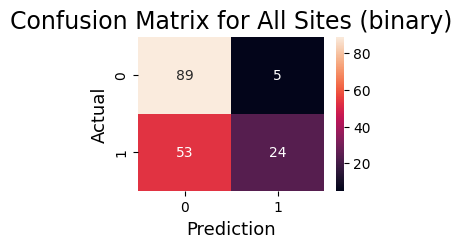

In [19]:
cfm_binary_SVM = confusion_matrix(y_test_binary, preds_binary_SVM, labels=clf_binary_SVM.classes_)

plt.figure(figsize=(5,3))
print_confusion_matrix(cfm_binary_SVM, 'All Sites (binary)')

### Model: KNN

The second most accurate model from the investigation was KNN. This next section investigates the accuracy of using a KNN model.

Train a KNN model on the training set and use it to make predictions. 
Display the accuracy.

In [20]:
clf_binary_KNN = KNeighborsClassifier().fit(X_train_binary, y_train_binary)

preds_binary_KNN = clf_binary_KNN.predict(X_test_binary)
accuracy_binary_KNN = accuracy_score(y_test_binary, preds_binary_KNN)
accuracy_binary_KNN

0.6608187134502924

### Confusion Matrix

Display the confusion matrix to understand what mistakes the model made.

<Figure size 500x300 with 0 Axes>

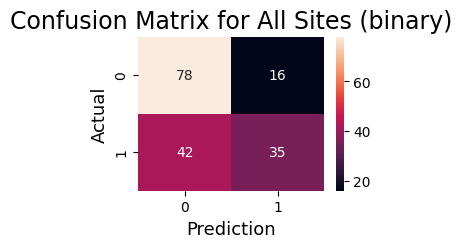

In [21]:
cfm_binary_KNN = confusion_matrix(y_test_binary, preds_binary_KNN, labels=clf_binary_KNN.classes_)

plt.figure(figsize=(5,3))
print_confusion_matrix(cfm_binary_KNN, 'All Sites (binary)')

Using KNN yielded the same accuracy score, but a different confusion matrix.